# 텍스트 분석 이해 - NLP와 텍스트 분석
---
` `   
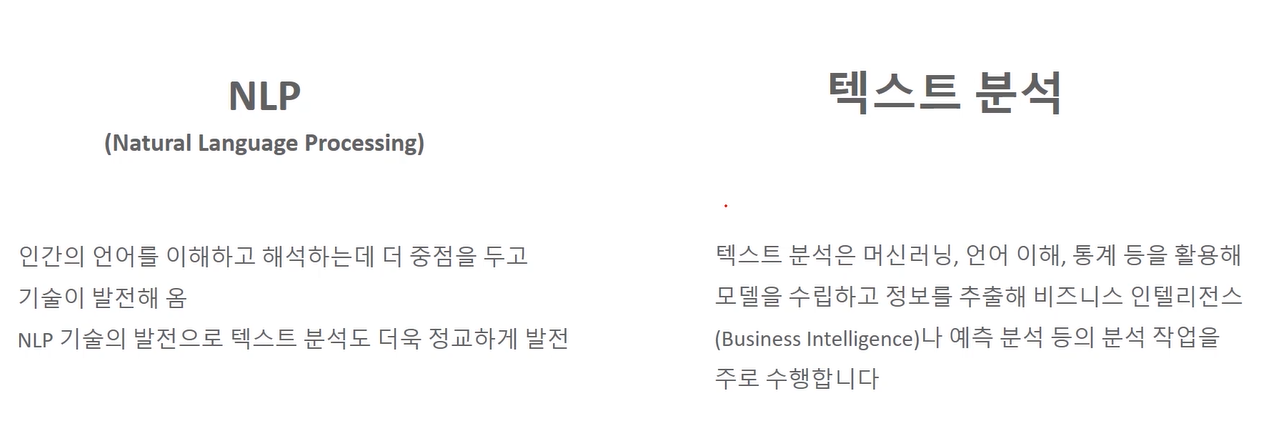

## 텍스트 분석 주요 영역
---
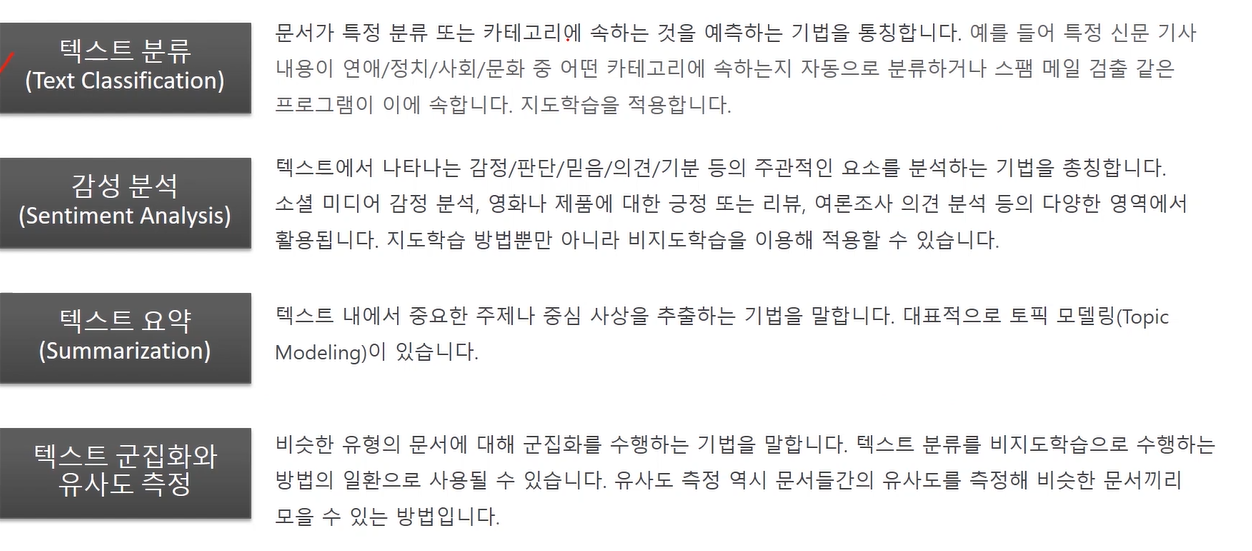

## 텍스트 분석 머신러닝 수행 프로세스
---
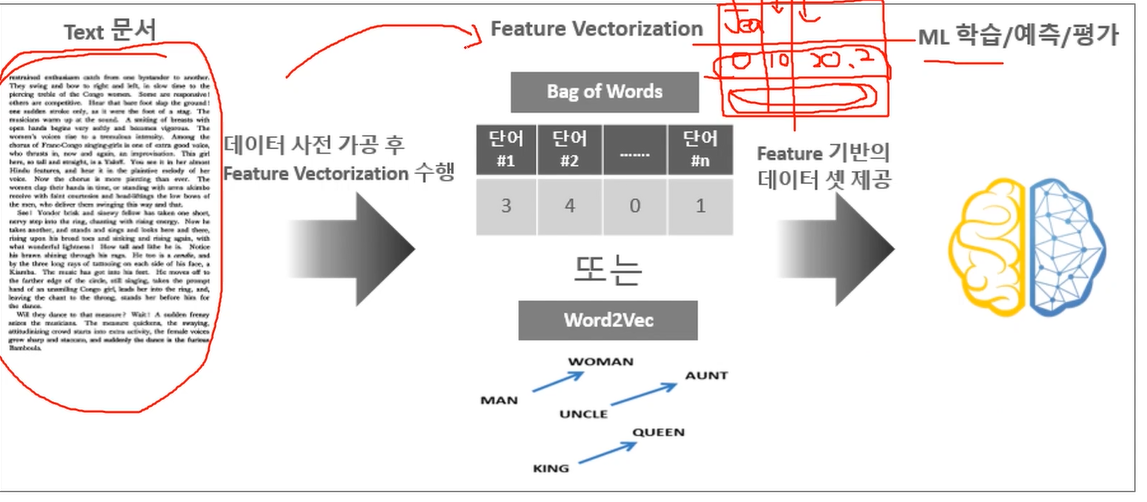

## 파이썬 기반의 NLP, 텍스트 분석 패키지
---
` `  
` `    
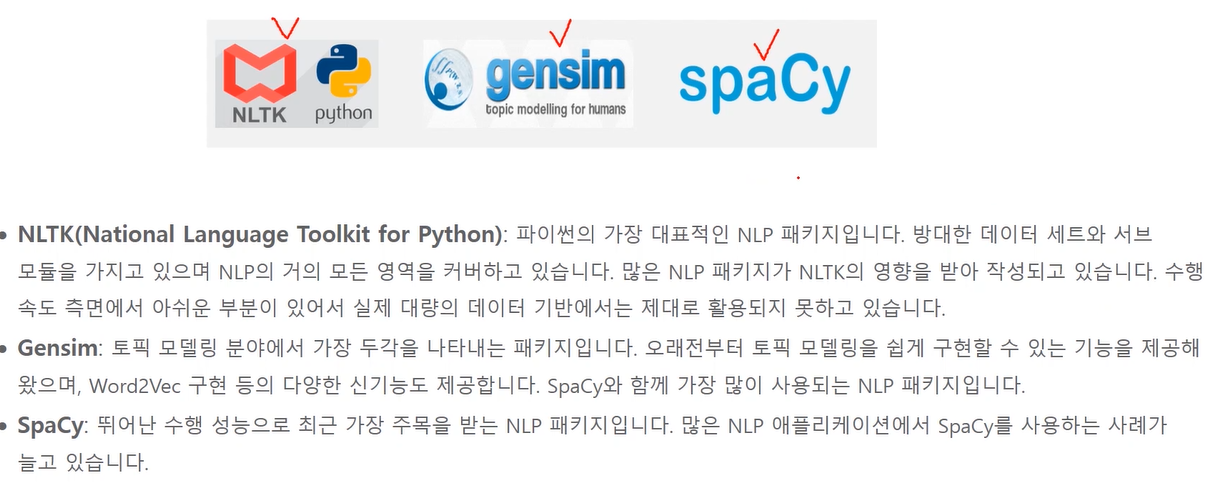

# 텍스트 전처리 - 텍스트 정규화
---
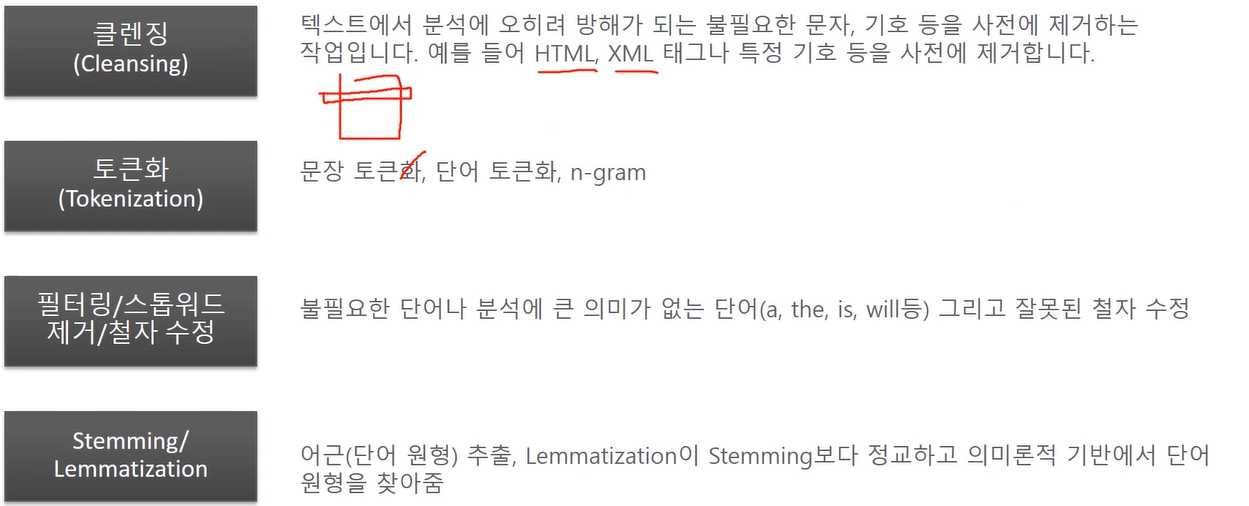

## N-gram
- 문장을 개별 단어 별로 하나씩 토큰화 할 경우 문맥적인 의미는 무시될 수 밖에 없다. 이러한 문제를 조금이라도 해결해보고자 도입 된 것이 n-gram이다
- n-gram은 연속된 n개의 단어를 하나의 토큰화 단위로 분리해 내는 것이다. n개 단어 크기 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화를 수행한다.
- 예를 들어 'Agent Smith Knocks the door' 를 2-gram(bigram)으로 만들면 (Agent, Smith),(Smith,knocks),(knocks,the),(the,door)와 같이 연속적으로 2개의 단어들을 순차적으로 이동하면서 단어들을 토큰화 한다.

### Text Tokenization

**문장 토큰화**

In [1]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\67416\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


**단어 토큰화**

In [2]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


**여러 문장들에 대한 단어 토큰화**

In [3]:
from nltk import word_tokenize, sent_tokenize

#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):
    
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행. 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


**n-gram**

In [5]:
from nltk import ngrams

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
all_ngrams = ngrams(words,3)
ngrams = [ngram for ngram in all_ngrams]
print(ngrams)

[('The', 'Matrix', 'is'), ('Matrix', 'is', 'everywhere'), ('is', 'everywhere', 'its'), ('everywhere', 'its', 'all'), ('its', 'all', 'around'), ('all', 'around', 'us'), ('around', 'us', ','), ('us', ',', 'here'), (',', 'here', 'even'), ('here', 'even', 'in'), ('even', 'in', 'this'), ('in', 'this', 'room'), ('this', 'room', '.')]


**stopwords 제거**

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\67416\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [8]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다. 
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


**Stemming과 Lemmatization**

In [9]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [10]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\67416\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


amuse amuse amuse
happy happy
fancy fancy
